<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-07-01 15:12:37.619981


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

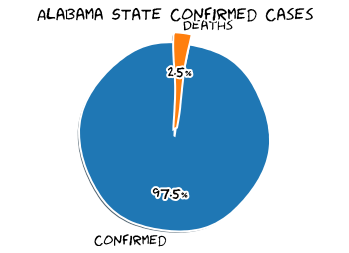

Alabama State Total Population
4887871
Alabama State Confirmed
38045 (0.7783552389169027% of population)
Alabama State Deaths
950 (2.4970429754238403% of confirmed)



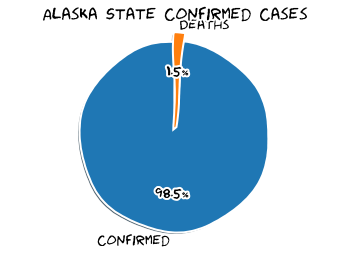

Alaska State Total Population
737438
Alaska State Confirmed
937 (0.1270615292404243% of population)
Alaska State Deaths
14 (1.4941302027748131% of confirmed)



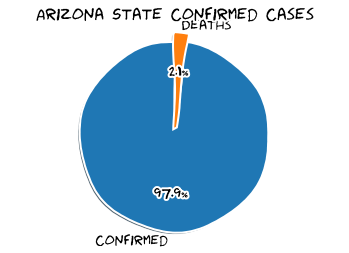

Arizona State Total Population
7171646
Arizona State Confirmed
79228 (1.1047394140759317% of population)
Arizona State Deaths
1645 (2.07628616145807% of confirmed)



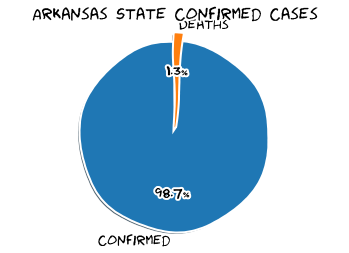

Arkansas State Total Population
3013825
Arkansas State Confirmed
20550 (0.681857772100238% of population)
Arkansas State Deaths
270 (1.313868613138686% of confirmed)



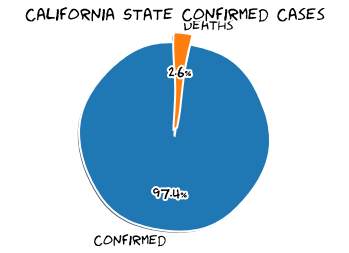

California State Total Population
39557045
California State Confirmed
232275 (0.5871899683103224% of population)
California State Deaths
6089 (2.6214616295339574% of confirmed)



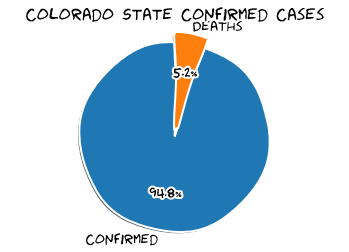

Colorado State Total Population
5695564
Colorado State Confirmed
32698 (0.5740959104313462% of population)
Colorado State Deaths
1690 (5.1685118355862745% of confirmed)



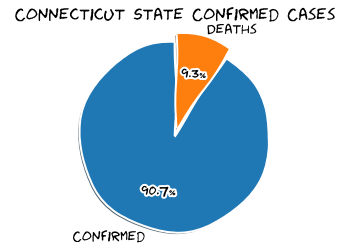

Connecticut State Total Population
3572665
Connecticut State Confirmed
46514 (1.3019412679330415% of population)
Connecticut State Deaths
4322 (9.29182611686804% of confirmed)



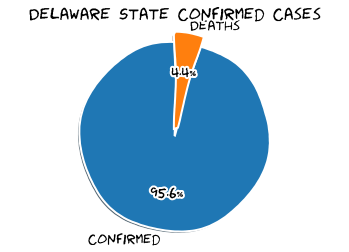

Delaware State Total Population
967171
Delaware State Confirmed
11474 (1.1863465715990242% of population)
Delaware State Deaths
509 (4.43611643716228% of confirmed)



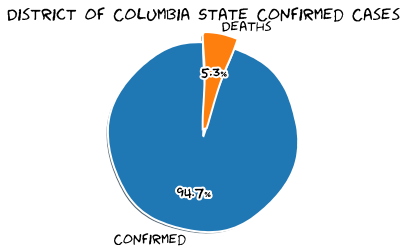

District of Columbia State Total Population
702455
District of Columbia State Confirmed
10365 (1.4755393583930643% of population)
District of Columbia State Deaths
553 (5.335262904003859% of confirmed)



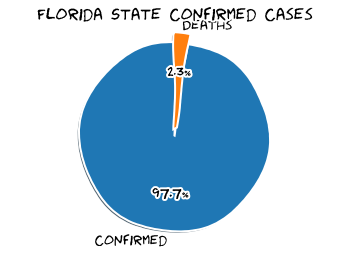

Florida State Total Population
21299325
Florida State Confirmed
152434 (0.7156752620094768% of population)
Florida State Deaths
3505 (2.2993557867667316% of confirmed)



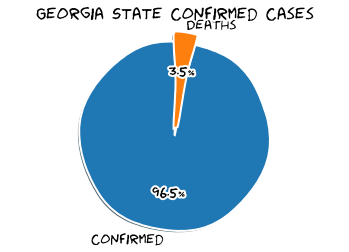

Georgia State Total Population
10519475
Georgia State Confirmed
81291 (0.7727667017603065% of population)
Georgia State Deaths
2805 (3.4505664833745433% of confirmed)



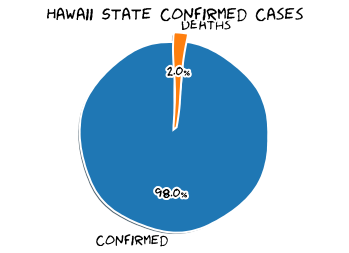

Hawaii State Total Population
1420491
Hawaii State Confirmed
917 (0.06455514325680346% of population)
Hawaii State Deaths
18 (1.9629225736095965% of confirmed)



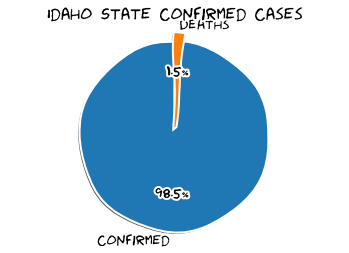

Idaho State Total Population
1754208
Idaho State Confirmed
6117 (0.3487043725715537% of population)
Idaho State Deaths
92 (1.5040052313225436% of confirmed)



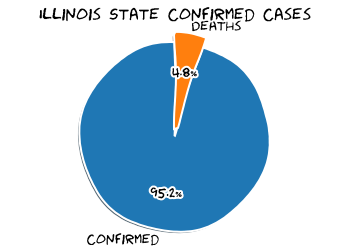

Illinois State Total Population
12741080
Illinois State Confirmed
143185 (1.12380583121682% of population)
Illinois State Deaths
6923 (4.835003666585187% of confirmed)



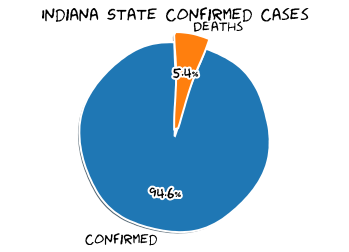

Indiana State Total Population
6691878
Indiana State Confirmed
45594 (0.6813334014756396% of population)
Indiana State Deaths
2448 (5.369127516778524% of confirmed)



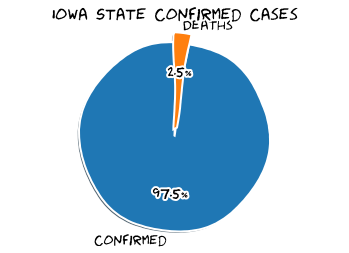

Iowa State Total Population
3156145
Iowa State Confirmed
29491 (0.9343994018018817% of population)
Iowa State Deaths
726 (2.461767997016039% of confirmed)



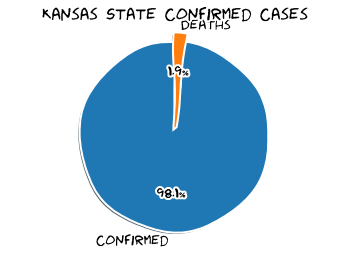

Kansas State Total Population
2911510
Kansas State Confirmed
14531 (0.499088102050139% of population)
Kansas State Deaths
273 (1.8787419998623631% of confirmed)



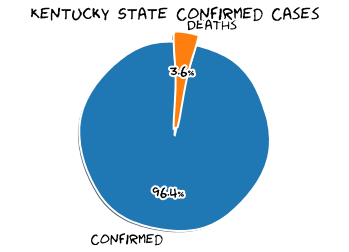

Kentucky State Total Population
4468402
Kentucky State Confirmed
15624 (0.3496552011211167% of population)
Kentucky State Deaths
565 (3.6162314388120844% of confirmed)



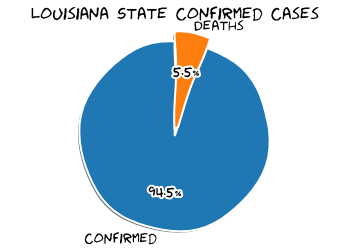

Louisiana State Total Population
4659978
Louisiana State Confirmed
58095 (1.2466797053548322% of population)
Louisiana State Deaths
3221 (5.544366985110595% of confirmed)



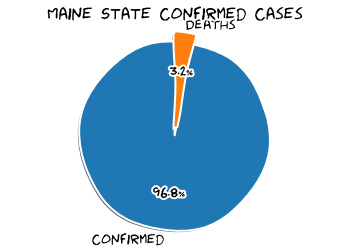

Maine State Total Population
1338404
Maine State Confirmed
3253 (0.24305067827053717% of population)
Maine State Deaths
105 (3.2277897325545655% of confirmed)



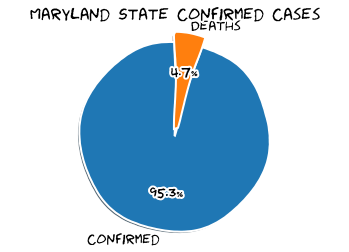

Maryland State Total Population
6042718
Maryland State Confirmed
67916 (1.123931317000065% of population)
Maryland State Deaths
3180 (4.6822545497379116% of confirmed)



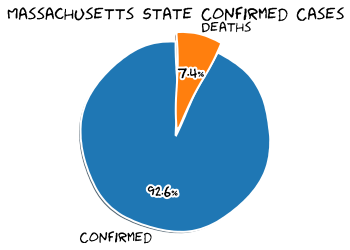

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
108882 (1.5775086860628478% of population)
Massachusetts State Deaths
8053 (7.3960801601733985% of confirmed)



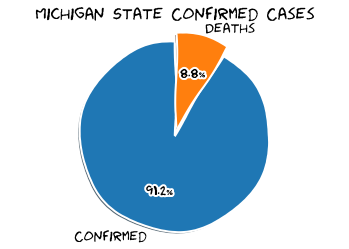

Michigan State Total Population
9995915
Michigan State Confirmed
70728 (0.707569041953638% of population)
Michigan State Deaths
6193 (8.756079629001244% of confirmed)



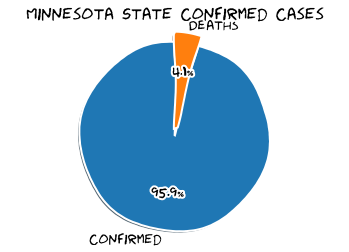

Minnesota State Total Population
5611179
Minnesota State Confirmed
36303 (0.6469763306428115% of population)
Minnesota State Deaths
1476 (4.065779687629122% of confirmed)



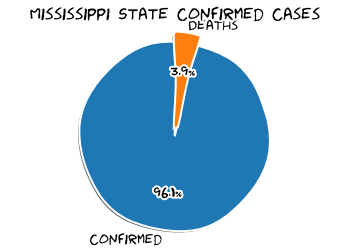

Mississippi State Total Population
2986530
Mississippi State Confirmed
27247 (0.9123296936578571% of population)
Mississippi State Deaths
1073 (3.938048225492715% of confirmed)



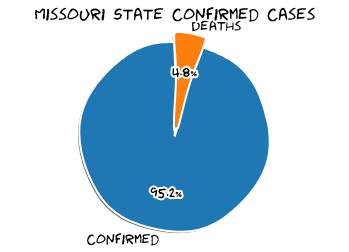

Missouri State Total Population
6126452
Missouri State Confirmed
21035 (0.3433471771263367% of population)
Missouri State Deaths
1018 (4.8395531257428095% of confirmed)



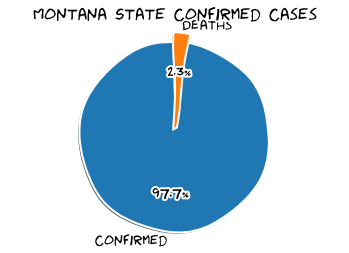

Montana State Total Population
1062305
Montana State Confirmed
967 (0.09102847110763858% of population)
Montana State Deaths
22 (2.2750775594622543% of confirmed)



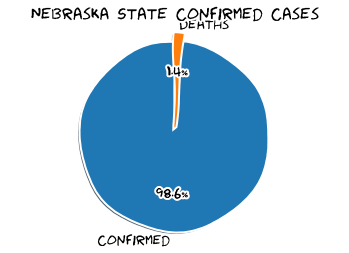

Nebraska State Total Population
1929268
Nebraska State Confirmed
19177 (0.9940039434645678% of population)
Nebraska State Deaths
274 (1.4287949105699536% of confirmed)



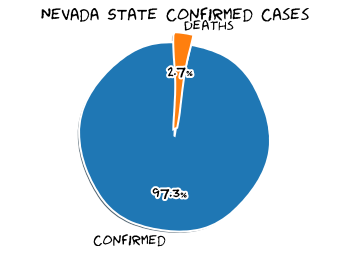

Nevada State Total Population
3034392
Nevada State Confirmed
18456 (0.6082272824341747% of population)
Nevada State Deaths
507 (2.747074122236671% of confirmed)



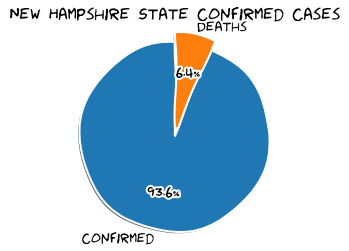

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5782 (0.4262572081111247% of population)
New Hampshire State Deaths
371 (6.416464891041162% of confirmed)



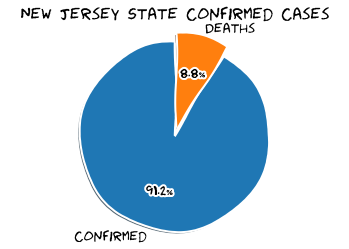

New Jersey State Total Population
8908520
New Jersey State Confirmed
171667 (1.9269979749722739% of population)
New Jersey State Deaths
15035 (8.758235420902096% of confirmed)



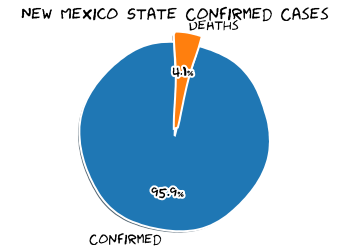

New Mexico State Total Population
2095428
New Mexico State Confirmed
12147 (0.5796906407664687% of population)
New Mexico State Deaths
497 (4.091545237507203% of confirmed)



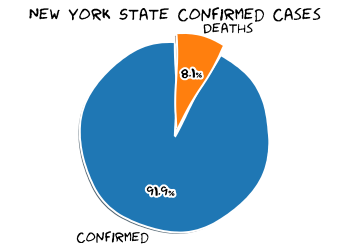

New York State Total Population
19542209
New York State Confirmed
393454 (2.0133547850194415% of population)
New York State Deaths
32032 (8.141231249396371% of confirmed)



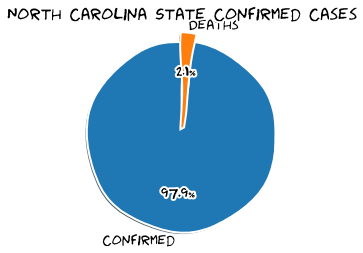

North Carolina State Total Population
10383620
North Carolina State Confirmed
65327 (0.6291351185809958% of population)
North Carolina State Deaths
1380 (2.1124496762441254% of confirmed)



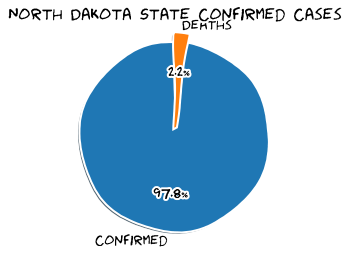

North Dakota State Total Population
760077
North Dakota State Confirmed
3613 (0.47534657672841046% of population)
North Dakota State Deaths
79 (2.186548574591752% of confirmed)



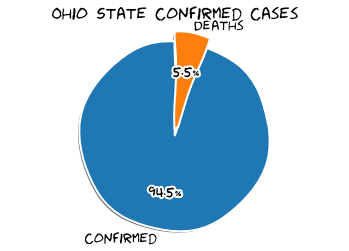

Ohio State Total Population
11689442
Ohio State Confirmed
51789 (0.4430408226500461% of population)
Ohio State Deaths
2863 (5.528200969317809% of confirmed)



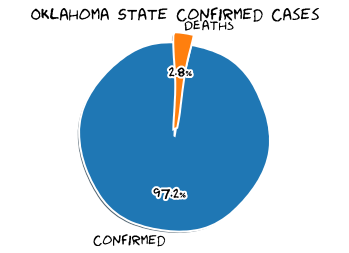

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
13757 (0.3488897889187612% of population)
Oklahoma State Deaths
387 (2.8131133241258994% of confirmed)



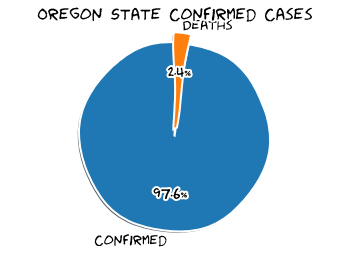

Oregon State Total Population
4190713
Oregon State Confirmed
8656 (0.20655196383049854% of population)
Oregon State Deaths
207 (2.391404805914972% of confirmed)



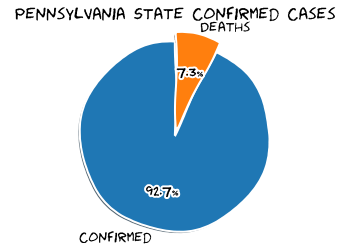

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
91139 (0.7116309285659628% of population)
Pennsylvania State Deaths
6649 (7.295449807436992% of confirmed)



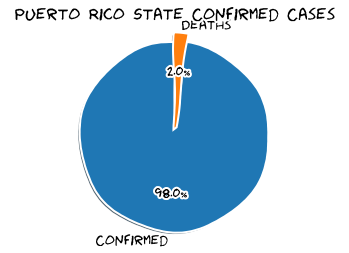

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
7537 (0.23588854743419171% of population)
Puerto Rico State Deaths
153 (2.0299854053336874% of confirmed)



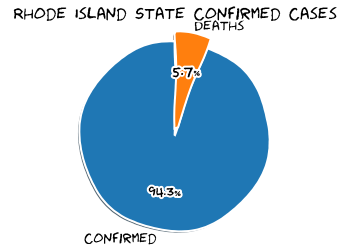

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
16813 (1.5901599807058446% of population)
Rhode Island State Deaths
950 (5.65038957949206% of confirmed)



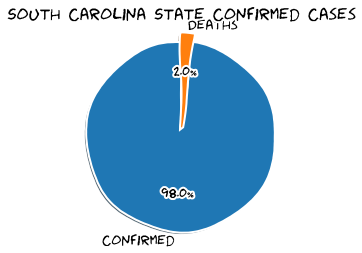

South Carolina State Total Population
5084127
South Carolina State Confirmed
36399 (0.715934122023309% of population)
South Carolina State Deaths
739 (2.0302755570207975% of confirmed)



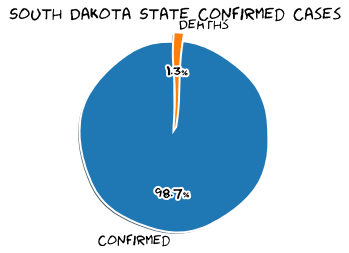

South Dakota State Total Population
882235
South Dakota State Confirmed
6764 (0.7666891474493757% of population)
South Dakota State Deaths
91 (1.345357776463631% of confirmed)



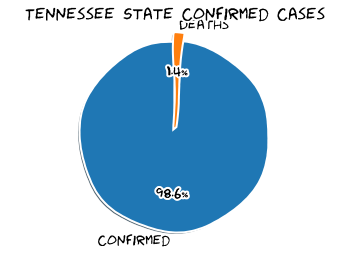

Tennessee State Total Population
6770010
Tennessee State Confirmed
43509 (0.6426726105279017% of population)
Tennessee State Deaths
604 (1.3882185294996436% of confirmed)



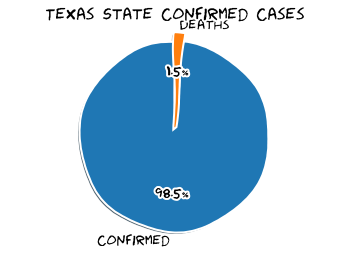

Texas State Total Population
28701845
Texas State Confirmed
163060 (0.5681167883109953% of population)
Texas State Deaths
2455 (1.5055807678155282% of confirmed)



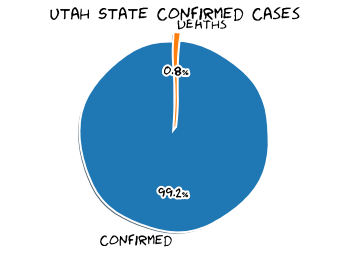

Utah State Total Population
3161105
Utah State Confirmed
22217 (0.7028238543167659% of population)
Utah State Deaths
172 (0.7741819327541972% of confirmed)



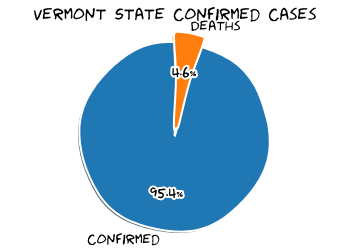

Vermont State Total Population
626299
Vermont State Confirmed
1208 (0.19287912003691526% of population)
Vermont State Deaths
56 (4.635761589403973% of confirmed)



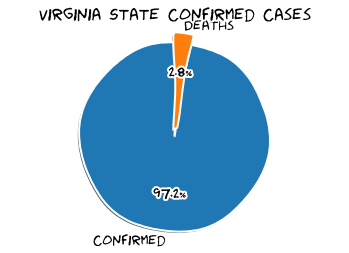

Virginia State Total Population
8517685
Virginia State Confirmed
62787 (0.7371369098528532% of population)
Virginia State Deaths
1763 (2.807906095210792% of confirmed)



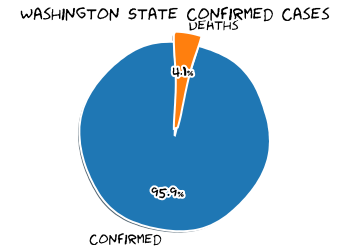

Washington State Total Population
7535591
Washington State Confirmed
32824 (0.43558627319343635% of population)
Washington State Deaths
1332 (4.058006336826712% of confirmed)



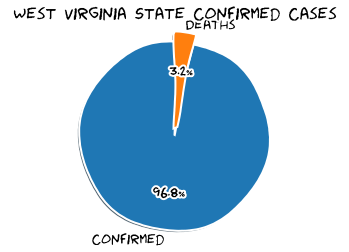

West Virginia State Total Population
1805832
West Virginia State Confirmed
2905 (0.1608676776134214% of population)
West Virginia State Deaths
93 (3.201376936316695% of confirmed)



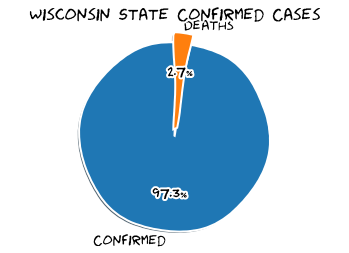

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
28659 (0.4929674857161729% of population)
Wisconsin State Deaths
784 (2.735615338986008% of confirmed)



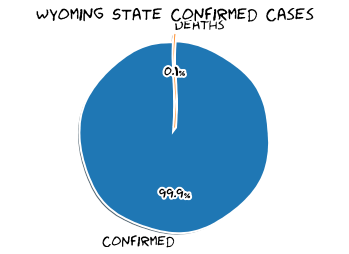

Wyoming State Total Population
577737
Wyoming State Confirmed
1487 (0.257383549954391% of population)
Wyoming State Deaths
1 (0.06724949562878278% of confirmed)



In [10]:
for i in states:
    state_details(i)

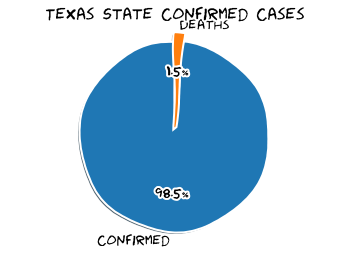

Texas State Total Population
28701845
Texas State Confirmed
163060 (0.5681167883109953% of population)
Texas State Deaths
2455 (1.5055807678155282% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
2637349
US Deaths
127228

New York City Confirmed
215179
New York City Deaths
23096

Philippines Confirmed
38511
Philippines Deaths
1270



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 10509749},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 511686},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-07-01T14:34:01.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 5386094},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-07-01 04:33:52,34.22333378,-82.46170658,113,0,0,113,"Abbeville, South Carolina, US",460.7167611203979,0.0
1,22001,Acadia,Louisiana,US,2020-07-01 04:33:52,30.2950649,-92.41419698,878,36,0,842,"Acadia, Louisiana, US",1415.1019421387703,4.100227790432802
2,51001,Accomack,Virginia,US,2020-07-01 04:33:52,37.76707161,-75.63234615,1042,14,0,1028,"Accomack, Virginia, US",3224.4089615051366,1.3435700575815739
3,16001,Ada,Idaho,US,2020-07-01 04:33:52,43.4526575,-116.24155159999998,2169,23,0,2146,"Ada, Idaho, US",450.38591157983916,1.0603964960811434
4,19001,Adair,Iowa,US,2020-07-01 04:33:52,41.33075609,-94.47105874,15,0,0,15,"Adair, Iowa, US",209.73154362416108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,,,,West Bank and Gaza,2020-07-01 04:33:52,31.9522,35.2332,2428,8,451,1969,West Bank and Gaza,47.594628628600375,0.32948929159802304
3783,,,,Western Sahara,2020-07-01 04:33:52,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3784,,,,Yemen,2020-07-01 04:33:52,15.552726999999999,48.516388,1158,312,488,358,Yemen,3.882522773443598,26.94300518134715
3785,,,,Zambia,2020-07-01 04:33:52,-13.133897,27.849332,1594,24,1329,241,Zambia,8.67060386785086,1.5056461731493098


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593614041000,40.767273,-73.971526,215179,0,23096,192083,New York City,36061,"New York City, New York, US",2581.069010,None,None,84036061,USA
1,California,US,1593614041000,34.308284,-118.228241,103872,0,3373,100499,Los Angeles,06037,"Los Angeles, California, US",1034.673702,None,None,84006037,USA
2,Illinois,US,1593614041000,41.841448,-87.816588,90536,0,4565,85971,Cook,17031,"Cook, Illinois, US",1757.901050,None,None,84017031,USA
3,Arizona,US,1593614041000,33.348359,-112.491815,48592,0,771,47821,Maricopa,04013,"Maricopa, Arizona, US",1083.333668,None,None,84004013,USA
4,New York,US,1593614041000,40.740665,-73.589419,41807,0,2182,39625,Nassau,36059,"Nassau, New York, US",3081.012643,None,None,84036059,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,New Hampshire,US,1593614041000,NaN,NaN,1,0,0,1,Unassigned,90033,"Unassigned, New Hampshire, US",NaN,None,None,84090033,USA
3061,Kansas,US,1593614041000,39.784208,-97.087532,1,0,0,1,Washington,20201,"Washington, Kansas, US",18.497965,None,None,84020201,USA
3062,West Virginia,US,1593614041000,38.493709,-80.420202,1,0,0,1,Webster,54101,"Webster, West Virginia, US",12.324378,None,None,84054101,USA
3063,Montana,US,1593614041000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593614041000,40.767273,-73.971526,215179,0,23096,192083,New York City,36061,"New York City, New York, US",2581.069010,None,None,84036061,USA
4,New York,US,1593614041000,40.740665,-73.589419,41807,0,2182,39625,Nassau,36059,"Nassau, New York, US",3081.012643,None,None,84036059,USA
5,New York,US,1593614041000,40.883201,-72.801217,41385,0,1981,39404,Suffolk,36103,"Suffolk, New York, US",2802.720572,None,None,84036103,USA
7,New York,US,1593614041000,41.162784,-73.757417,34838,0,1425,33413,Westchester,36119,"Westchester, New York, US",3600.804543,None,None,84036119,USA
31,New York,US,1593614041000,41.150279,-74.025605,13590,0,667,12923,Rockland,36087,"Rockland, New York, US",4171.411558,None,None,84036087,USA
46,New York,US,1593614041000,41.403375,-74.302408,10723,0,478,10245,Orange,36071,"Orange, New York, US",2785.628929,None,None,84036071,USA
73,New York,US,1593614041000,42.762490,-78.730637,7292,0,634,6658,Erie,36029,"Erie, New York, US",793.728543,None,None,84036029,USA
117,New York,US,1593614041000,41.764861,-73.743567,4207,0,151,4056,Dutchess,36027,"Dutchess, New York, US",1429.892121,None,None,84036027,USA
129,New York,US,1593614041000,43.146389,-77.693229,3742,0,266,3476,Monroe,36055,"Monroe, New York, US",504.469040,None,None,84036055,USA
168,New York,US,1593614041000,43.004919,-76.199712,2842,0,184,2658,Onondaga,36067,"Onondaga, New York, US",617.117743,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

393454

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593614041000,40.767273,-73.971526,215179,0,23096,192083,New York City,36061,"New York City, New York, US",2581.06901,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
57,None,Philippines,1593614041000,12.879721,121.774017,38511,10438,1270,26803.0,None,None,Philippines,35.143839,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
